# Import libraries

In [56]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import scipy.stats as stats

# Generate sample

In [72]:
samples = 100
features = 1
lower_bound = 0
upper_bound = 1000
intercept = 10
coeffecients = [20]
sigma = 1000

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
# print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
# print("Labels are: ", y)



Shape of samples is:  (100, 1)

 Shape of labels is:  (100,)


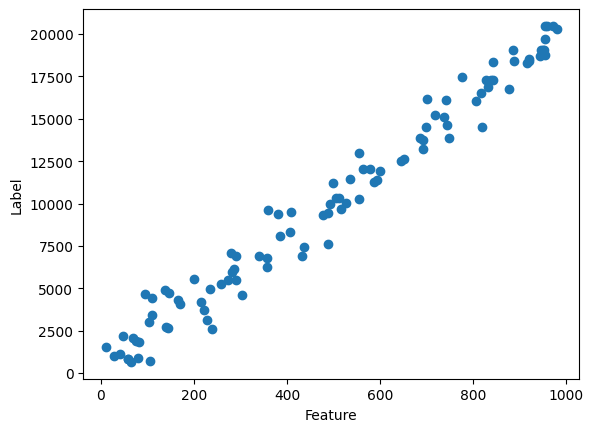

In [73]:
# Plot of samples - To verify linearity assumption

plt.scatter(X,y)
plt.xlabel("Feature")
plt.ylabel("Label")
plt.show()


# Train model

In [74]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3640.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.66e-79
Time:                        00:42:16   Log-Likelihood:                -831.84
No. Observations:                 100   AIC:                             1668.
Df Residuals:                      98   BIC:                             1673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.4875    191.446      1.585      0.116     -76.431     683.406
x1            19.9228      0.330     60.329      0.000      19.267      20.578
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.005
Skew:                           0.009   Prob(JB):                        0.998
Kurtosis:                       3.027   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Prediction

Mean squared error is:  983529.046396012
Estimated standard deviation in errors is:  991.7303294726909
Actual standard deviation in errors is:  1000


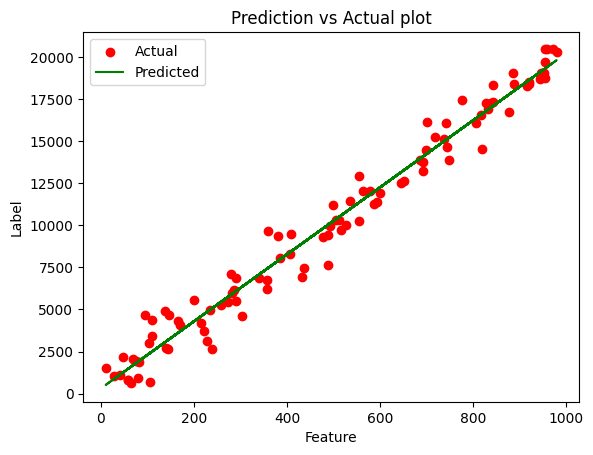

In [96]:
# Predictions

y_pred = model_results.predict(X_with_intercept)
mean_squared_error = np.mean((y - y_pred) ** 2)
print("Mean squared error is: ",mean_squared_error)
print("Estimated standard deviation in errors is: ",np.sqrt(mean_squared_error))
print("Actual standard deviation in errors is: ", sigma)

# Plot of actual and predicted labels

plt.scatter(X,y,color='r',label='Actual')
plt.plot(X,y_pred,color='g',label='Predicted')
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("Prediction vs Actual plot")
plt.legend()
plt.show()


# Error plots

Min error is:  -2441.784159488617
Max error is:  2499.396160478747
Mean of errors is:  0.0


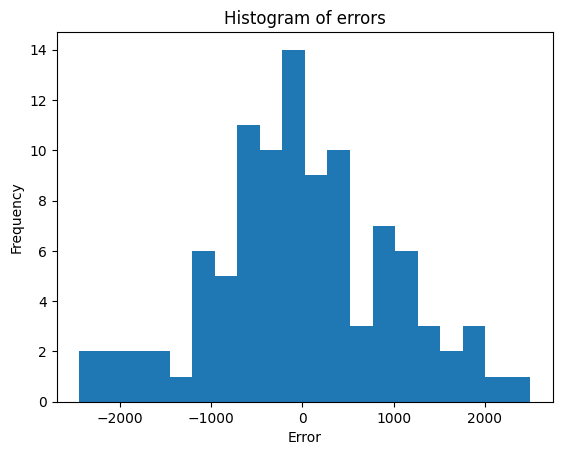

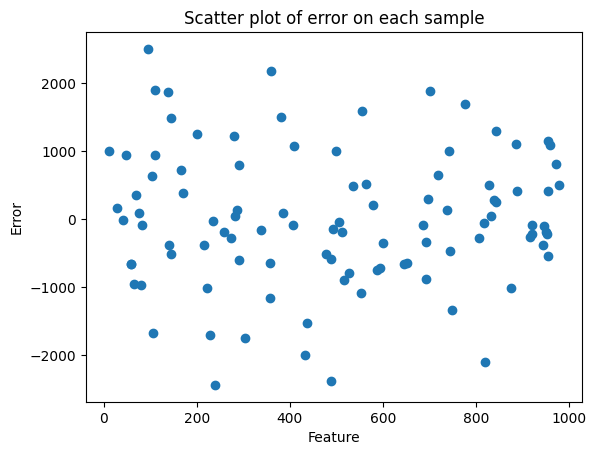

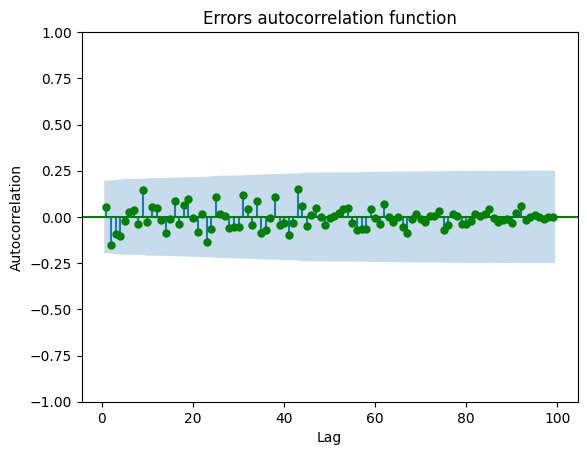

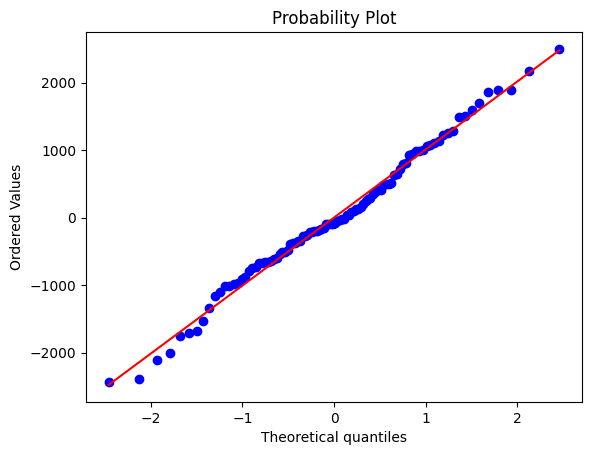

In [97]:
# Plot of errors

errors = y-y_pred

# Error Statistics - To check mean of errors

print("Min error is: ",np.min(errors))
print("Max error is: ",np.max(errors))
print("Mean of errors is: ",round(np.mean(errors),2))

# Histogram of errors - To check Normality

plt.hist(errors, bins=samples//5)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of errors")
plt.show()

# Error scatter plot - To check homoscedasticity

plt.scatter(X,errors)
plt.xlabel("Feature")
plt.ylabel("Error")
plt.title("Scatter plot of error on each sample")
plt.show()

# Error autocorrelation plot - To check independence of errors

tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Error Q-Q plot - To check normality

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 
